# Lab 3
- EC9630: Machine Learning
- Artificial Neural Networks

- 2019/E/136
- SUBASINGE S.A.B.D.

In [29]:
# Q01
# a)
from tensorflow import keras
import numpy as np
#load fasion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

# Split the dataset into train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

num_classes = len(set(train_labels))
print("# of classesL:",num_classes)

# of classesL: 10


The Fashion-MNIST dataset is basically designed for classification tasks not for regression. Each image in the dataset belongs to one of the ten predefined classes representing different types of clothing items. Therefore, the goal of using this dataset is to train models to classify images into these classes accurately.

In [30]:
# b)
# Get the size of the images
image_size = train_images.shape[1:]  # Shape of the train_images excluding the number of samples
print("Size of the images:", image_size)

Size of the images: (28, 28)


In [31]:
# c)
# Get the number of images in the train data
num_train_images = train_images.shape[0]
print("Number of images in the train data:", num_train_images)

Number of images in the train data: 60000


In [32]:
# d)
# Get the number of images in the test data
num_test_images = test_images.shape[0]
print("Number of images in the test data:", num_test_images)

Number of images in the test data: 10000


In [33]:
# e)
# Get the number of classes and the class labels
num_classes = len(set(train_labels))
# class_labels = [
#     'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
# ]
print("Number of classes:", num_classes)


Number of classes: 10


10 different classes mensioned above, as following:

- 0: T-shirt/top;
- 1: Trouser;
- 2: Pullover;
- 3: Dress;
- 4: Coat;
- 5: Sandal;
- 6: Shirt;
- 7: Sneaker;
- 8: Bag;
- 9: Ankle boot.
- Image dimmensions are 28x28.

In [34]:
#Q 02
# done

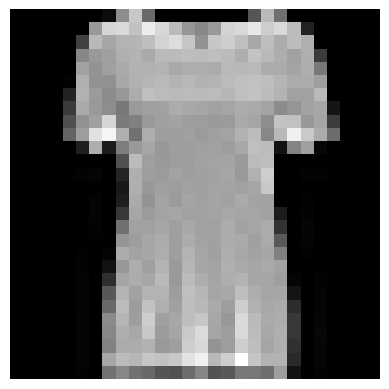

In [35]:
# Q03
# View the 11th image in the training data
import matplotlib.pyplot as plt
plt.imshow(train_images[10], cmap='gray')
plt.axis('off')
plt.show()

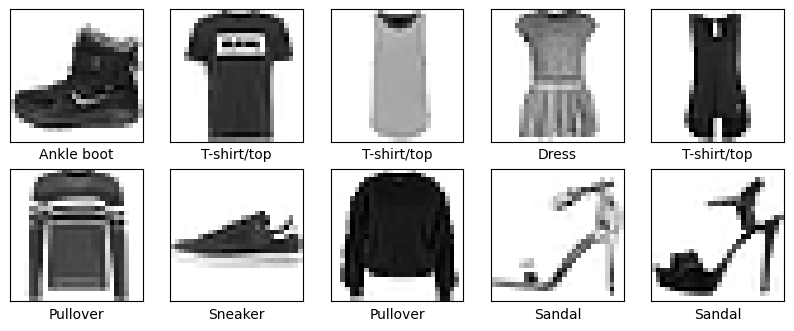

In [36]:
# Q4
# Normalize the data between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


# plot first 10 figures(normalized)
class_labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [37]:
# Q05
# Divide the training data into validation and training sets

val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

In [38]:
# Q06
# Initialize weight and bias parameters of the model
weight_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
bias_init = keras.initializers.Zeros()


In [39]:
# Q07
# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init),
    keras.layers.Dense(128, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init),
    keras.layers.Dense(10, activation='softmax')
])

# Q09
# Print the summary of the network
model.summary()

c:\Users\Banuka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Q08)<br>
(a) What is the use of Flatten layer?

Its purpose is to convert multidimensional input data into a single dimension, which is typically required for subsequent fully connected layers or dense layers.

(b) Generally, softmax activation function is used in the output layer of the classification networks. Why?


The softmax function takes a vector of real-valued inputs and normalizes them into a probability distribution. It exponentiates each input element and divides it by the sum of exponentiated values across all classes. This normalization ensures that the output values represent the probability of the input belonging to each class.

In [40]:
# Q10
# Compile the model with desired loss function, optimizer, and metrics
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Q11
# Train the model on the training data and validate
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1719/1719 [==============================] - 21s 6ms/step - loss: 0.5114 - accuracy: 0.8151 - val_loss: 0.3918 - val_accuracy: 0.8580
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3674 - accuracy: 0.8646 - val_loss: 0.3906 - val_accuracy: 0.8556
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3306 - accuracy: 0.8788 - val_loss: 0.3234 - val_accuracy: 0.8798
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3057 - accuracy: 0.8868 - val_loss: 0.3090 - val_accuracy: 0.8910
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2902 - accuracy: 0.8920 - val_loss: 0.3233 - val_accuracy: 0.8848
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2734 - accuracy: 0.8976 - val_loss: 0.3268 - val_accuracy: 0.8880
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2614 - accuracy: 0.9028 - val_loss: 0.3107 - val_accuracy

In [41]:
# Q12
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nAccuracy on test data:", test_acc)
print('\ntest loss',test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8814

Accuracy on test data: 0.8813999891281128

test loss 0.34253019094467163


In [42]:
# Q13
import tensorflow as tf
import numpy as np
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
# predict first five images
print(np.argmax(predictions[0]),
np.argmax(predictions[1]),
np.argmax(predictions[2]),
np.argmax(predictions[3]),
np.argmax(predictions[4]))



313/313 [==============================] - 1s 2ms/step
9 2 1 1 6
